 ### image thresholding 
- A fundamental technique in image processing used to convert grayscale images into binary images (black & white). It’s widely used in segmentation, OCR, and object detection.


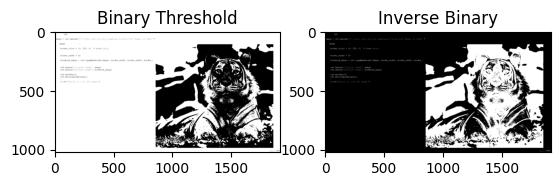

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('own-sketch-to-the-image.webp', cv2.IMREAD_GRAYSCALE)

# Apply simple threshold
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Inverse binary threshold
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.subplot(1,2,1); plt.imshow(thresh1, cmap='gray'); plt.title("Binary Threshold")
plt.subplot(1,2,2); plt.imshow(thresh2, cmap='gray'); plt.title("Inverse Binary")
plt.show()

Types of Thresholding
OpenCV supports several modes:
- cv2.THRESH_BINARY → above threshold = max value, else 0
- cv2.THRESH_BINARY_INV → inverse of binary
- cv2.THRESH_TRUNC → values above threshold set to threshold
- cv2.THRESH_TOZERO → values below threshold set to 0
- cv2.THRESH_TOZERO_INV → inverse of TOZERO


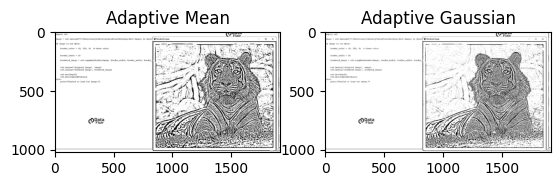

In [2]:
# Adaptive Mean Thresholding
thresh_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian Thresholding
thresh_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

plt.subplot(1,2,1); plt.imshow(thresh_mean, cmap='gray'); plt.title("Adaptive Mean")
plt.subplot(1,2,2); plt.imshow(thresh_gauss, cmap='gray'); plt.title("Adaptive Gaussian")
plt.show()

### Key Notes
- Global thresholding → single threshold value for the whole image.
- Adaptive thresholding → threshold calculated for small regions, better for uneven illumination.
- Thresholding is often a preprocessing step before morphological operations or contour detection.


#### Thresholding is used to convert grayscale images into binary images, making it easier to separate objects from the background. It’s mainly applied in image segmentation, object detection, and feature extraction.

🔎 Why Thresholding is Important
- Simplifies images: Converts complex grayscale images (0–255 pixel values) into just two levels (black and white).
- Separates foreground and background: Makes objects stand out clearly from their surroundings.
- Reduces data complexity: Binary images are easier to process for algorithms.
- Preprocessing step: Often used before contour detection, morphological operations, or OCR (optical character recognition).

🖼️ What Thresholding Does
Thresholding compares each pixel’s intensity to a chosen value:
- If pixel ≥ threshold → set to white (255).
- If pixel < threshold → set to black (0).
This creates a binary mask that highlights regions of interest.

📊 Uses of Thresholding
- Image Segmentation → dividing an image into meaningful regions (e.g., separating cells in medical images).
- Object Detection → isolating shapes like coins, text, or vehicles.
- Feature Extraction → preparing images for edge detection or pattern recognition.
- Document Processing → converting scanned text into clean black-and-white for OCR.
- Industrial Inspection → detecting defects in products by separating faulty regions.

⚡ Types of Thresholding
- Global Thresholding → one fixed value for the whole image.
- Adaptive Thresholding → threshold varies across regions (good for uneven lighting).
- Otsu’s Thresholding → automatically finds the best threshold by minimizing intra-class variance.

🔑 Key Takeaway
Thresholding is a foundational tool in computer vision because it transforms raw pixel data into a simplified form that highlights the most important structures, making subsequent analysis faster and more accurate.




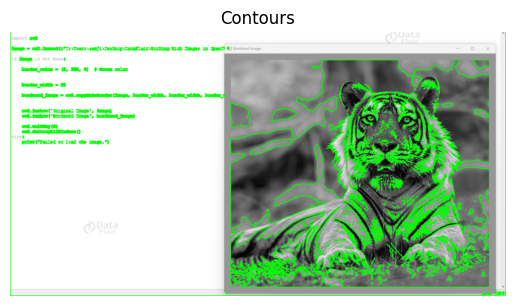

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('own-sketch-to-the-image.webp', cv2.IMREAD_GRAYSCALE)

# Threshold to get binary image
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_color, contours, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis('off')
plt.show()


What are Contours?
- A contour is simply a curve joining all continuous points along a boundary with the same intensity.
- In practice, contours are extracted from binary images (after thresholding or edge detection).
⚡ Key Parameters
- cv2.findContours()
- RETR_TREE → retrieves all contours and hierarchy.
- CHAIN_APPROX_SIMPLE → compresses horizontal/vertical segments, saving memory.
- cv2.drawContours()
- -1 → draw all contours.
- (0,255,0) → color (green here).
- 2 → thickness.

🔑 Uses of Contours
- Shape analysis → detect circles, rectangles, polygons.
- Object detection → isolate objects from background.
- Measurement → calculate area, perimeter, centroid.
- Image segmentation → separate regions of interest.


### Image Alignment?
- Aligning means transforming one image so that its features match another image.
- Typically involves translation, rotation, scaling, or perspective (homography).
- Requires detecting keypoints (features) and finding a mapping between them.

📊 Steps for Image Alignment in OpenCV
1. Feature Detection
- Use algorithms like ORB, SIFT, or SURF to detect keypoints.

2. Feature Matching
- Match descriptors between images.

3. Find Homography (Transformation Matrix)
- Estimate the transformation that aligns the images.

4. Warp the Image
- Apply the transformation to align.



In [4]:
import cv2
import numpy as np
# Load images
img1 = cv2.imread('checkerboardimage.jpg', 0)  # reference
img2 = cv2.imread('own-sketch-to-the-image.webp', 0)  # to align

# ORB detector
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [5]:
# Brute Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [6]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [8]:
h, w = img1.shape
aligned_img = cv2.warpPerspective(img2, M, (w, h))

cv2.imshow("Aligned Image", aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

⚡ Applications
- Panorama stitching → combining multiple photos into one wide view.
- Medical imaging → aligning scans from different times/modalities.
- Object tracking → aligning template with live video frames.
- Augmented reality → overlaying graphics on real-world objects.
